In [ ]:
  
 #This example uses Python 2.7 and the python-request library.

from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '37efe915-316e-45a6-9b0f-13e5739f58f3',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)
# I had to go in and put "jupyter notebook --NotebookApp.iopub_data_rate_limit=1e10"
# Into the Anaconda prompt to change this to allow to pull data

In [4]:
type(data)

dict

In [ ]:
import pandas as pd

pd.set_option('display.max_columns', None)

In [ ]:
df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')
df

In [ ]:

def run_api():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '37efe915-316e-45a6-9b0f-13e5739f58f3',
    }
    
    session = Session()
    session.headers.update(headers)
    
    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)

# I had to go in and put "jupyter notebook --NotebookApp.iopub_data_rate_limit=1e10"
# Into the Anaconda prompt to change this to allow to pull data
    
    df = pd.json_normalize(data['data'])
    df['timestamp'] = pd.to_datetime('now')
    df

    if not os.path.isfile(r'C:\Users\Mahi\API.csv'):
        df.to_csv(r'C:\Users\Mahi\API.csv', header = 'column_names')
    else:
        df.to_csv(r'C:\Users\Mahi\API.csv', mode = 'a',header = False)        


In [ ]:
import os
from time import time
from time import sleep

for i in range(333):    # 333 because the api key has a limit of 333 per day 
    run_api()
    print("API is running successfully")
    sleep(60)  # after running sleep for a minute
exit()

In [141]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11747,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19760490.00000,19760490.00000,False,NaN,1,NaN,NaN,None,2024-09-29T13:15:00.000Z,65753.00935,13868942594.79520,-42.59440,0.05251,0.44051,4.64595,10.45605,-0.82346,4.76265,1299311683780.56812,56.50600,1380813196403.12012,None,2024-09-29T13:15:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-09-29 18:47:06.130559
1,1027,Ethereum,ETH,ethereum,9364,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120366230.40261,120366230.40261,True,NaN,2,NaN,NaN,None,2024-09-29T13:14:00.000Z,2652.37199,10224762100.34699,-30.76030,-0.15799,-0.10319,2.53256,5.04384,-20.13640,-23.52953,319256017473.73767,13.88970,319256017473.73999,None,2024-09-29T13:14:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-09-29 18:47:06.130559
2,825,Tether USDt,USDT,tether,98970,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,119518802450.52103,121372683870.57474,True,NaN,3,NaN,NaN,None,2024-09-29T13:14:00.000Z,1.00019,35279890097.85310,-31.84730,0.01110,-0.01375,0.00071,0.00964,0.07778,0.14205,119541967070.97791,5.20080,121396207802.36000,None,2024-09-29T13:14:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-09-29 18:47:06.130559
3,1839,BNB,BNB,bnb,2251,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,145932902.30982,145932902.30982,False,NaN,4,NaN,NaN,None,2024-09-29T13:14:00.000Z,596.08532,1573384861.60255,-24.37050,-0.30798,-0.32184,2.34238,10.04608,1.73557,2.92911,86988460587.33812,3.78220,86988460587.34000,None,2024-09-29T13:14:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-09-29 18:47:06.130559
4,5426,Solana,SOL,solana,747,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,468935745.42734,585529620.87742,True,NaN,5,NaN,NaN,None,2024-09-29T13:14:00.000Z,156.65193,1285897650.97954,-41.89810,-0.27504,0.04579,8.19162,11.89467,-13.58212,6.06071,73459688865.07962,3.19470,91724344305.95000,None,2024-09-29T13:14:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-09-29 18:47:06.130559
5,3408,USDC,USDC,usd-coin,22234,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,36266260841.50305,36266260841.50305,False,NaN,6,NaN,NaN,None,2024-09-29T13:14:00.000Z,0.99992,2689324849.46959,-42.36270,-0.00362,-0.01907,-0.01712,-0.00481,0.01403,-0.00522,36263498306.94736,1.57710,36263498306.95000,None,2024-09-29T13:14:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-09-29 18:47:06.130559
6,52,XRP,XRP,xrp,1397,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,56564039920.00000,99987161962.00000,False,NaN,7,NaN,NaN,None,2024-09-29T13:15:00.000Z,0.62548,1621687742.85169,-18.24540,0.03364,1.60026,5.81565,10.70956,-3.97403,30.08109,35379683392.53358,1.53920,62548013618.85000,None,2024-09-29T13:15:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-09-29 18:47:06.130559
7,74,Dogecoin,DOGE,dogecoin,1075,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,146158196383.70520,146158196383.70520,True,NaN,8,NaN,NaN,None,2024-09-29T13:15:00.000Z,0.12621,1316525282.64648,9.83410,-0.62461,2.81949,18.21980,24.39244,-0.00589,1.21186,18446258564.17177,0.80220,18446258564.17000,None,2024-09-29T13:15:00.000Z,NaN,NaN

In [143]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [94]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11747,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19760446.00000,19760446.00000,False,NaN,1,NaN,NaN,None,2024-09-29T12:02:00.000Z,65748.94391,14020705566.96762,-44.78920,0.26125,-0.02599,4.65050,10.61950,-0.48000,5.02076,1299228455775.57812,56.42280,1380727822200.33008,None,2024-09-29T12:02:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-09-29 17:33:13.685980
1,1027,Ethereum,ETH,ethereum,9364,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120366230.40261,120366230.40261,True,NaN,2,NaN,NaN,None,2024-09-29T12:01:00.000Z,2653.36774,10349399277.17620,-30.94070,0.25689,-0.78592,2.74732,5.58661,-20.10705,-23.23848,319375872163.20459,13.86780,319375872163.20001,None,2024-09-29T12:01:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-09-29 17:33:13.685980
2,825,Tether USDt,USDT,tether,98967,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,119518802450.52103,121372683870.57474,True,NaN,3,NaN,NaN,None,2024-09-29T12:01:00.000Z,1.00009,35202540662.15435,-34.29980,-0.00467,-0.00002,-0.03279,-0.00869,0.06655,0.13680,119529309543.23225,5.19010,121383353941.02000,None,2024-09-29T12:01:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-09-29 17:33:13.685980
3,1839,BNB,BNB,bnb,2251,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,145932906.30185,145932906.30185,False,NaN,4,NaN,NaN,None,2024-09-29T12:01:00.000Z,597.64205,1587928513.13343,-27.38310,0.25431,-0.74704,2.69220,10.99530,1.90738,3.59151,87215640562.16699,3.78770,87215640562.17000,None,2024-09-29T12:01:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-09-29 17:33:13.685980
4,5426,Solana,SOL,solana,747,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,468936400.80647,585529948.55657,True,NaN,5,NaN,NaN,None,2024-09-29T12:01:00.000Z,156.80997,1287271133.58896,-44.29140,0.41031,-0.22569,8.20339,13.09692,-13.68253,7.42324,73533903738.05708,3.19330,91816934660.78000,None,2024-09-29T12:01:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-09-29 17:33:13.685980
5,3408,USDC,USDC,usd-coin,22234,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,36265768930.69263,36265768930.69263,False,NaN,6,NaN,NaN,None,2024-09-29T12:01:00.000Z,0.99995,2729172681.13540,-43.43720,-0.00467,0.00025,-0.02753,-0.00609,0.00945,0.01527,36264109860.76699,1.57480,36264109860.77000,None,2024-09-29T12:01:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-09-29 17:33:13.685980
6,52,XRP,XRP,xrp,1397,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,56564039920.00000,99987161962.00000,False,NaN,7,NaN,NaN,None,2024-09-29T12:02:00.000Z,0.62480,1669421728.87964,-13.97070,-0.52765,1.26086,5.32265,10.79594,-3.80950,30.43109,35341157594.07356,1.53500,62479903564.27000,None,2024-09-29T12:02:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-09-29 17:33:13.685980
7,74,Dogecoin,DOGE,dogecoin,1075,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,146157296383.70523,146157296383.70523,True,NaN,8,NaN,NaN,None,2024-09-29T12:02:00.000Z,0.12706,1313951652.93885,7.24790,0.00125,1.77161,19.10484,25.42910,1.27216,2.12915,18571279322.32749,0.80650,18571279322.33000,None,2024-09-29T12:02:00.000Z,NaN,NaN,

In [145]:
df3 = df.groupby('name', sort=False) [['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()

In [147]:
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,0.05251,0.44051,4.64595,10.45605,-0.82346,4.76265
Ethereum,-0.15799,-0.10319,2.53256,5.04384,-20.13640,-23.52953
Tether USDt,0.01110,-0.01375,0.00071,0.00964,0.07778,0.14205
BNB,-0.30798,-0.32184,2.34238,10.04608,1.73557,2.92911
Solana,-0.27504,0.04579,8.19162,11.89467,-13.58212,6.06071
USDC,-0.00362,-0.01907,-0.01712,-0.00481,0.01403,-0.00522
XRP,0.03364,1.60026,5.81565,10.70956,-3.97403,30.08109
Dogecoin,-0.62461,2.81949,18.21980,24.39244,-0.00589,1.21186
Toncoin,-0.28315,-1.02867,4.02456,7.08629,-14.98593,-23.68529


In [149]:
df4 = df3.stack()
df4

name                                  
Bitcoin   quote.USD.percent_change_1h      0.05251
          quote.USD.percent_change_24h     0.44051
          quote.USD.percent_change_7d      4.64595
          quote.USD.percent_change_30d    10.45605
          quote.USD.percent_change_60d    -0.82346
                                            ...   
Polkadot  quote.USD.percent_change_24h    -1.51808
          quote.USD.percent_change_7d      7.89624
          quote.USD.percent_change_30d    10.03674
          quote.USD.percent_change_60d   -14.93876
          quote.USD.percent_change_90d   -25.65674
Length: 90, dtype: float64

In [151]:
type(df4)

pandas.core.series.Series

In [153]:
df5 = df4.to_frame(name = 'values')
df5

values
name                                           
Bitcoin  quote.USD.percent_change_1h    0.05251
         quote.USD.percent_change_24h   0.44051
         quote.USD.percent_change_7d    4.64595
         quote.USD.percent_change_30d  10.45605
         quote.USD.percent_change_60d  -0.82346
...                                         ...
Polkadot quote.USD.percent_change_24h  -1.51808
         quote.USD.percent_change_7d    7.89624
         quote.USD.percent_change_30d  10.03674
         quote.USD.percent_change_60d -14.93876
         quote.USD.percent_change_90d -25.65674

[90 rows x 1 columns]

In [155]:
df5.count()

values    90
dtype: int64

In [157]:
index = pd.Index(range(90))

df6 = df5.reset_index()
df6

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,0.05251
1,Bitcoin,quote.USD.percent_change_24h,0.44051
2,Bitcoin,quote.USD.percent_change_7d,4.64595
3,Bitcoin,quote.USD.percent_change_30d,10.45605
4,Bitcoin,quote.USD.percent_change_60d,-0.82346
...,...,...,...
85,Polkadot,quote.USD.percent_change_24h,-1.51808
86,Polkadot,quote.USD.percent_change_7d,7.89624
87,Polkadot,quote.USD.percent_change_30d,10.03674
88,Polkadot,quote.USD.percent_change_60d,-14.93876


In [118]:
df7 = df6.rename(columns= {'level_1': "percentage_change"})
df7

,name,percentage_change,values
0,Bitcoin,quote.USD.percent_change_1h,0.26125
1,Bitcoin,quote.USD.percent_change_24h,-0.02599
2,Bitcoin,quote.USD.percent_change_7d,4.65050
3,Bitcoin,quote.USD.percent_change_30d,10.61950
4,Bitcoin,quote.USD.percent_change_60d,-0.48000
...,...,...,...
85,Polkadot,quote.USD.percent_change_24h,-1.70600
86,Polkadot,quote.USD.percent_change_7d,8.88079
87,Polkadot,quote.USD.percent_change_30d,10.82029
88,Polkadot,quote.USD.percent_change_60d,-14.46711


In [159]:
# simplifying the percentage values

df7['percentage_change'] = df7['percentage_change'].replace(['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['1h','24','7d','30d','60d','90d'])
df7

,name,percentage_change,values
0,Bitcoin,1h,0.26125
1,Bitcoin,24,-0.02599
2,Bitcoin,7d,4.65050
3,Bitcoin,30d,10.61950
4,Bitcoin,60d,-0.48000
...,...,...,...
85,Polkadot,24,-1.70600
86,Polkadot,7d,8.88079
87,Polkadot,30d,10.82029
88,Polkadot,60d,-14.46711


In [161]:
import seaborn as sns
import matplotlib.pyplot as plt

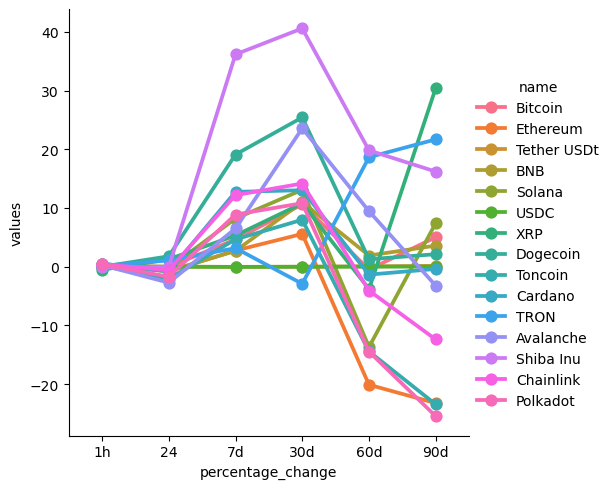

In [163]:
sns.catplot(x='percentage_change', y='values', hue= 'name', data= df7, kind= 'point')

In [167]:
df10 = df[['name', 'quote.USD.price','timestamp']]
df10  = df10.query("name == 'Bitcoin'")
df10

,name,quote.USD.price,timestamp
0,Bitcoin,65753.00935,2024-09-29 18:47:06.130559
